In [1]:
import pandas as pd
import direction_transition as dit
import paths
from preprocessing import read_csv_clean

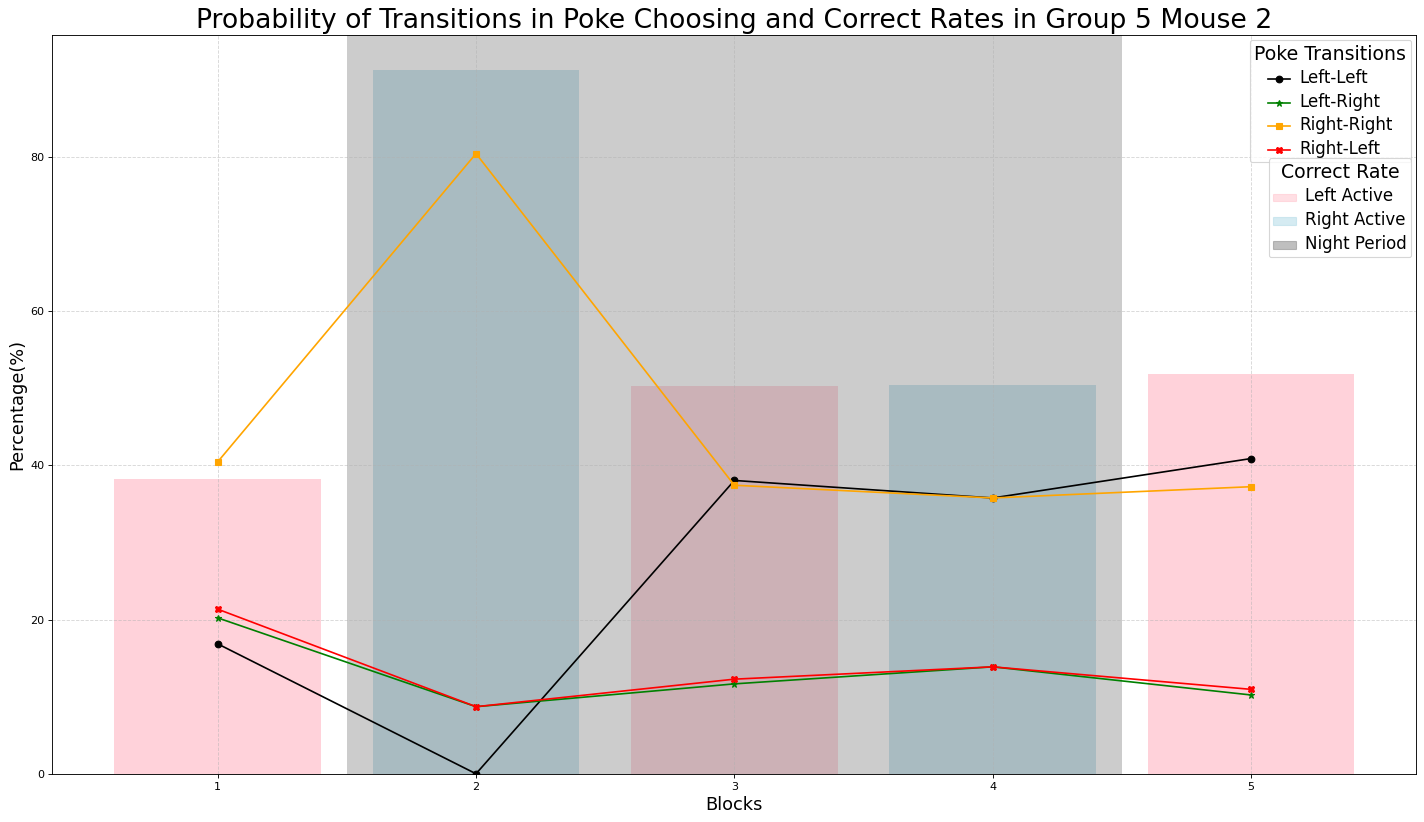

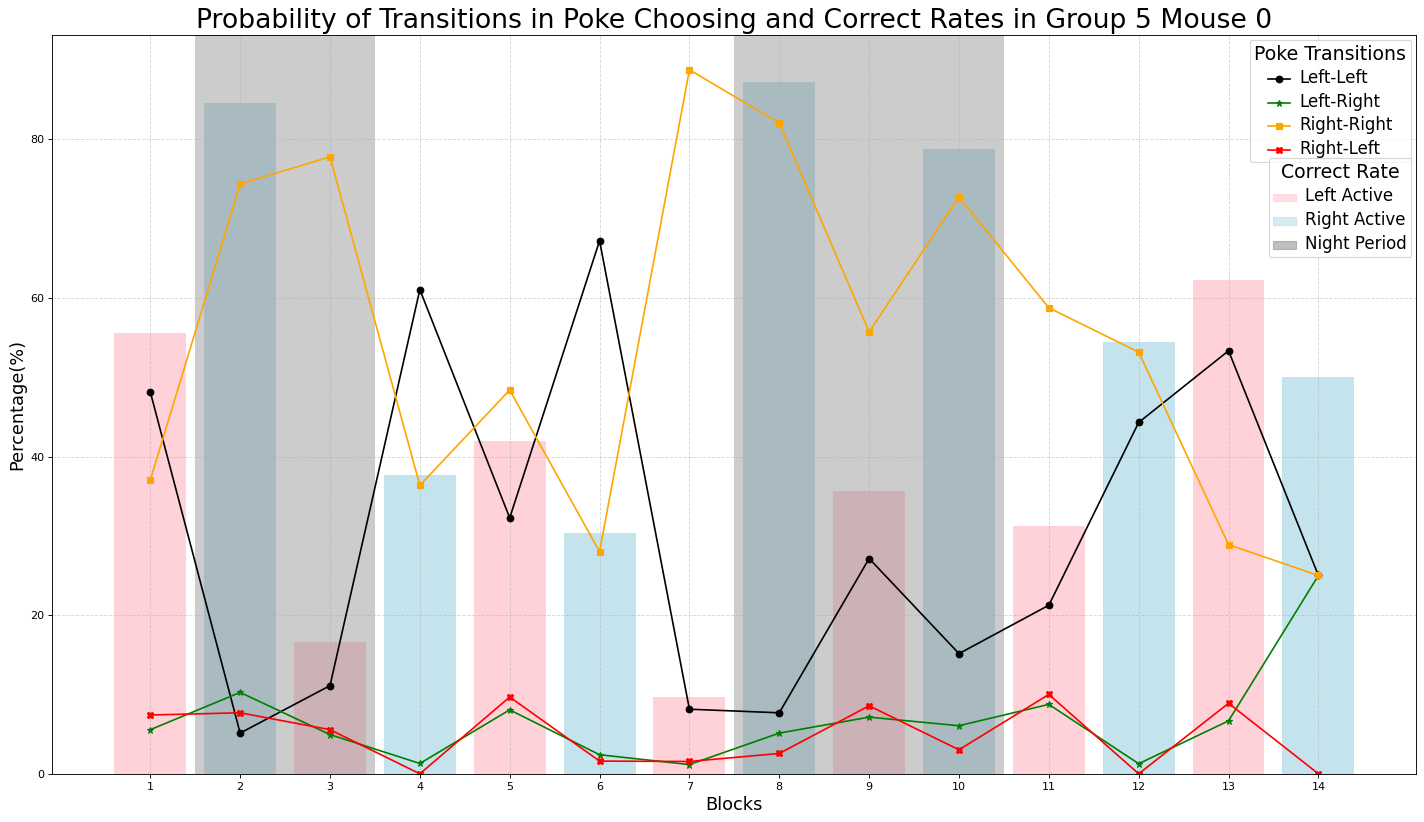

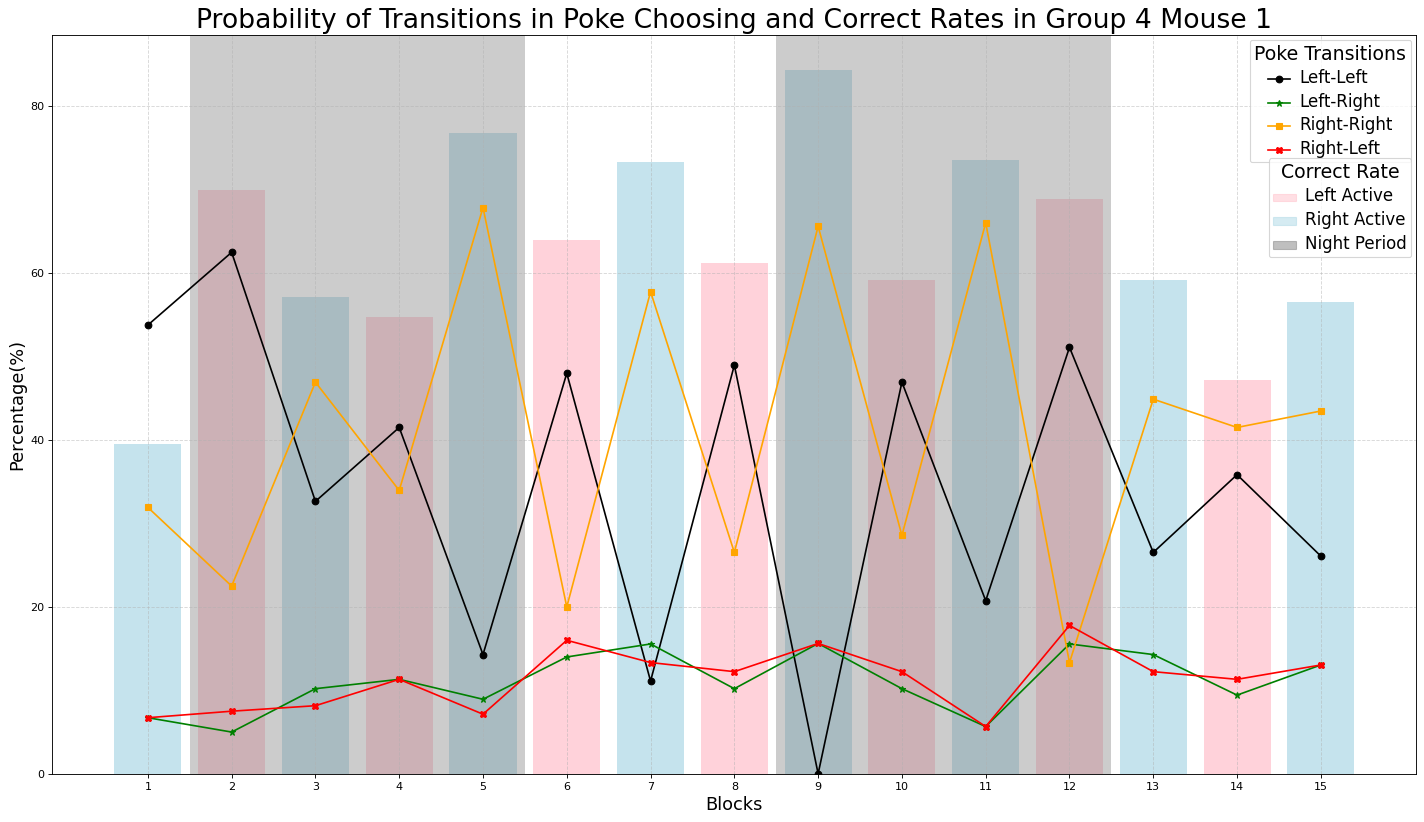

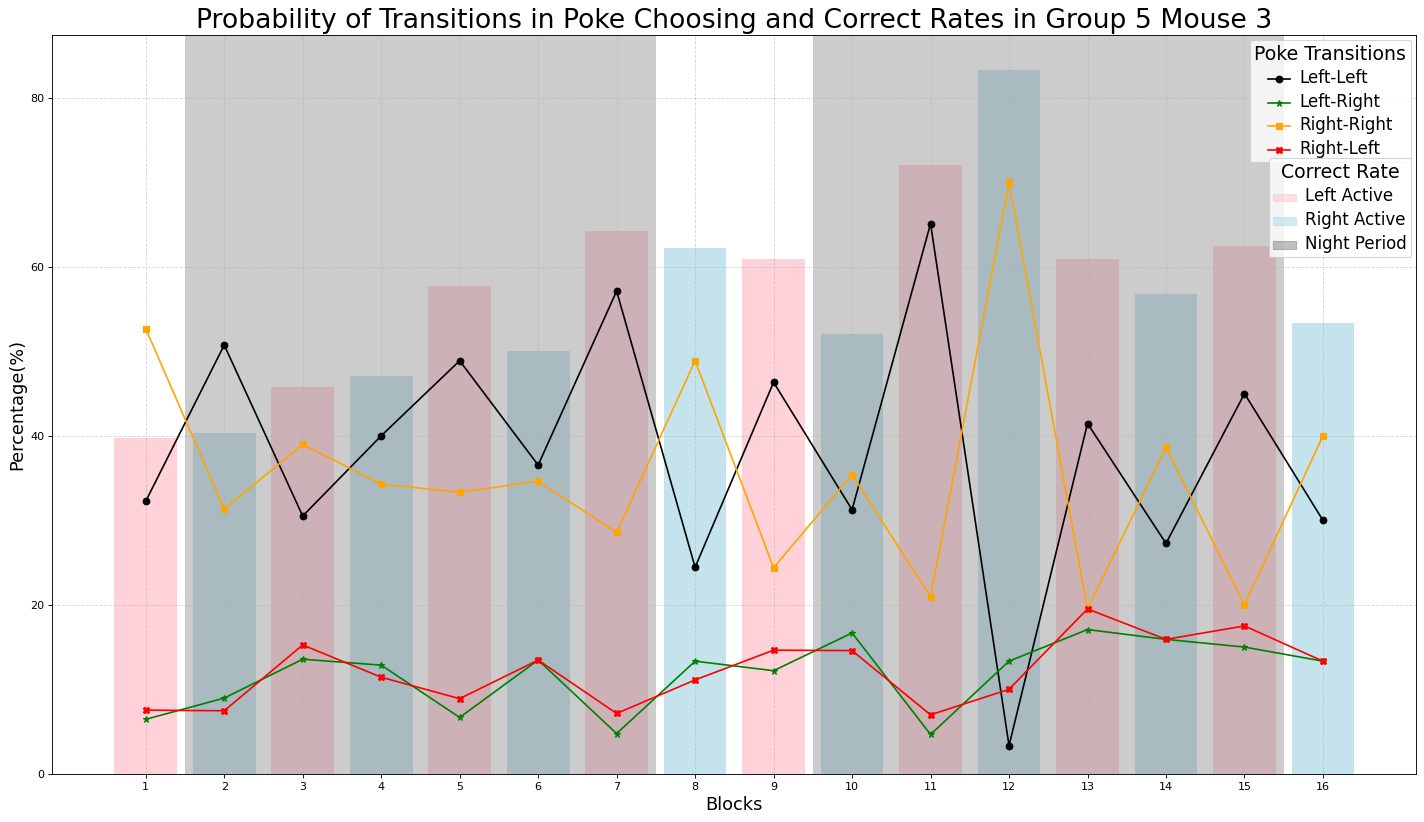

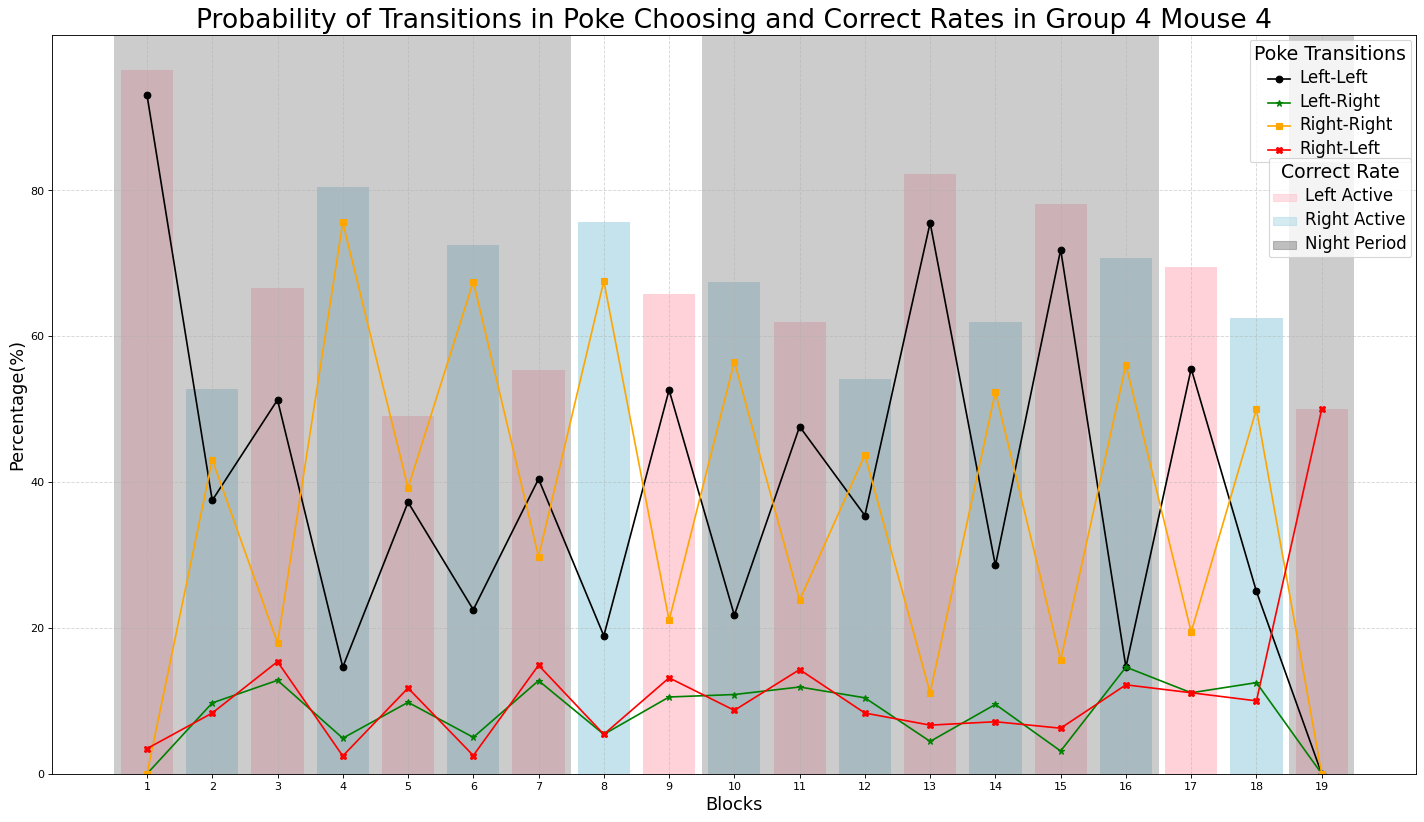

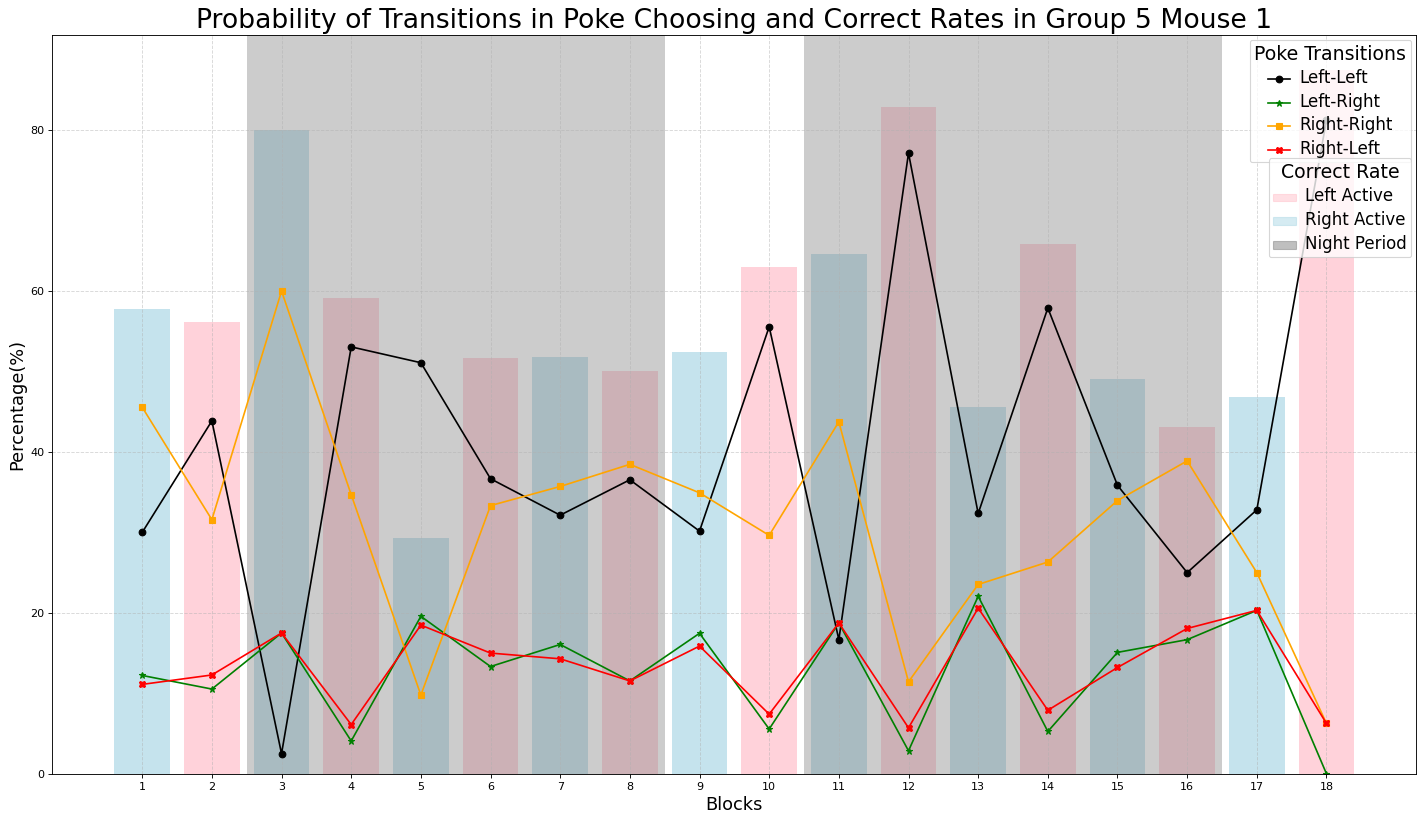

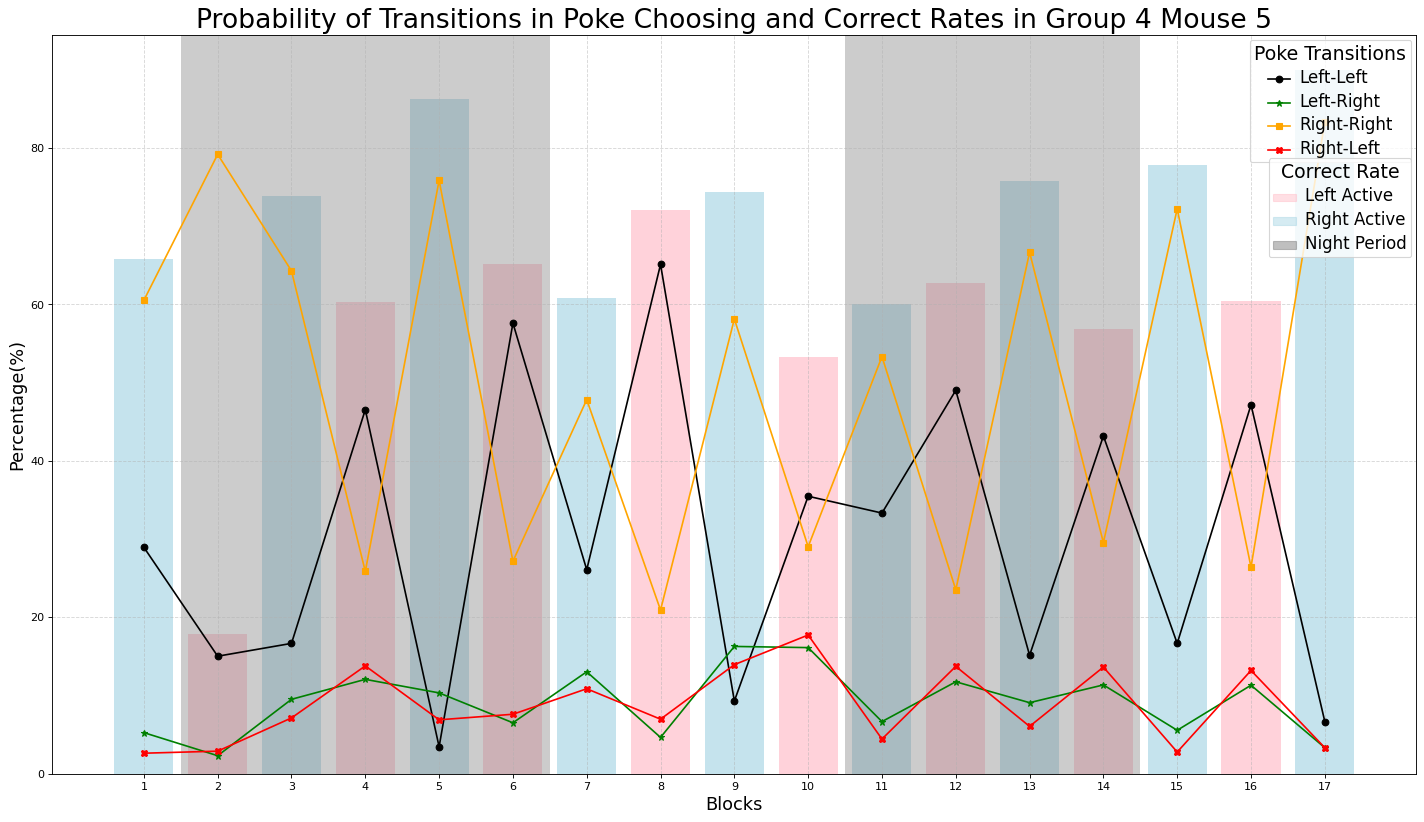

In [7]:
ctrl_scores = []

for path in paths.reversal_ivsa_ctrl[1:]:
        data_dropped = read_csv_clean(path, remove_trivial=False)
        blocks = dit.split_data_to_blocks(data_dropped)
        data_stats = dit.get_transition_info(blocks)
        dit.graph_tranition_stats(data_stats, blocks, path)
        diff, left_start = dit.get_difference_key(data_stats)
        ctrl_scores.append(dit.learning_score_grad(diff, left_start))
    


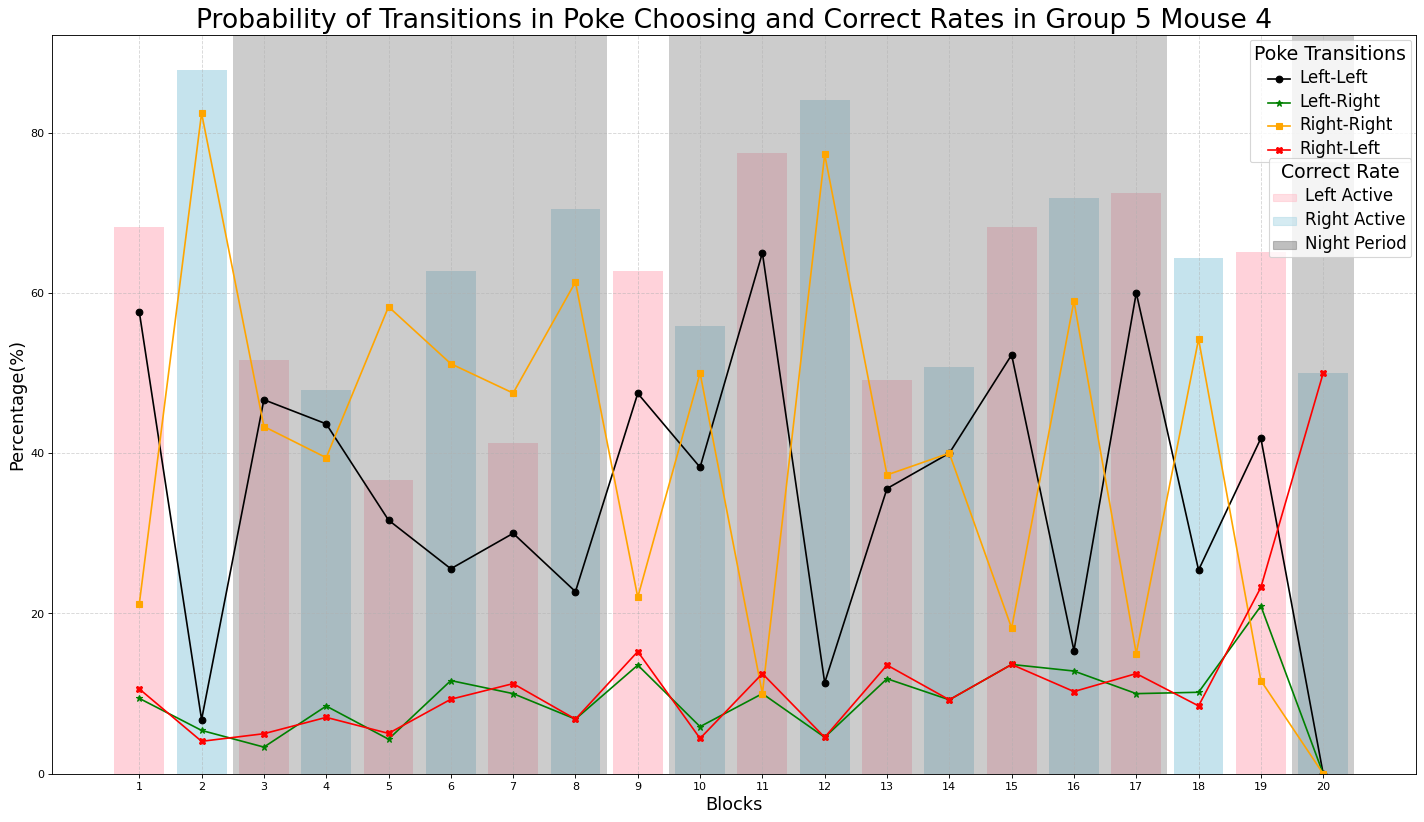

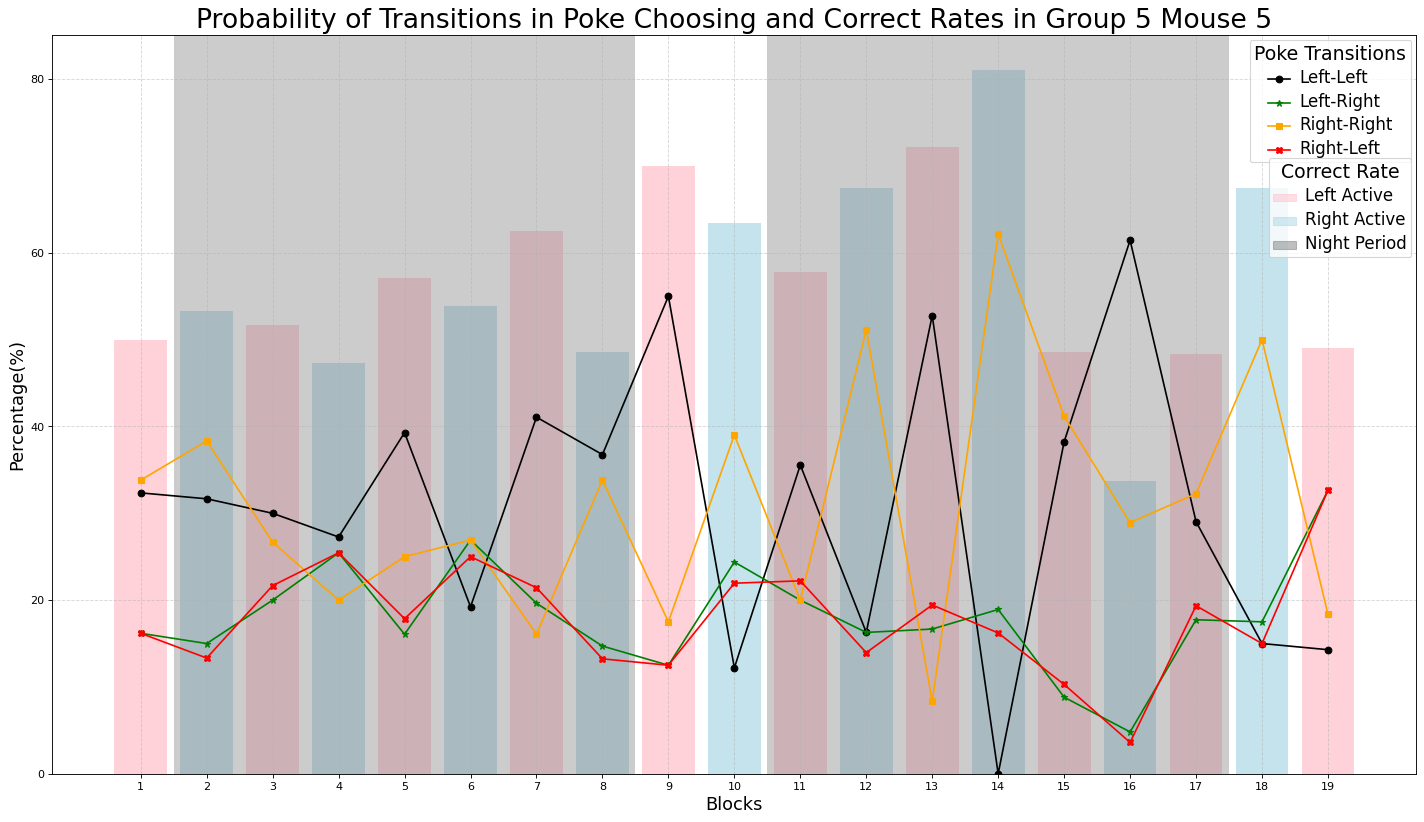

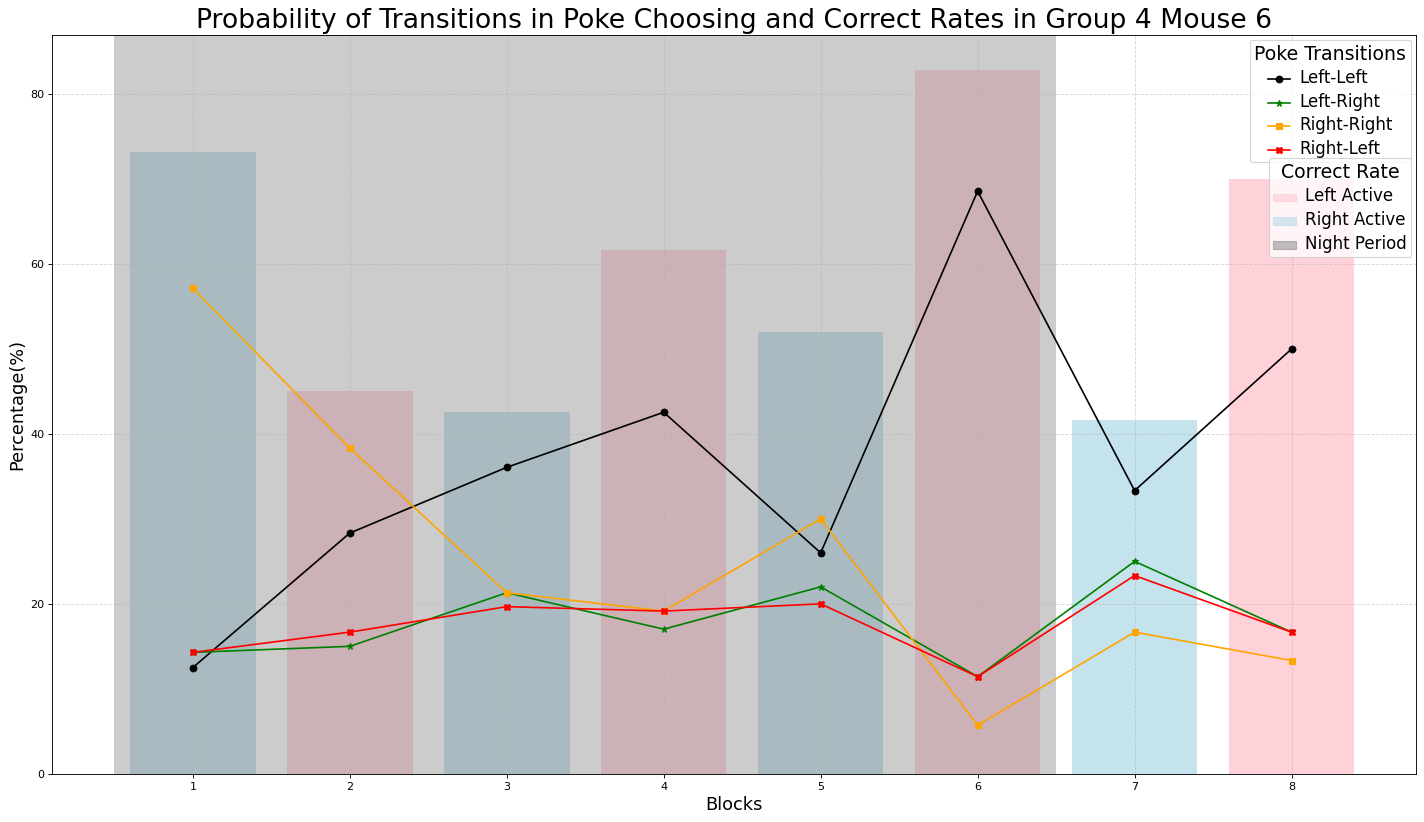

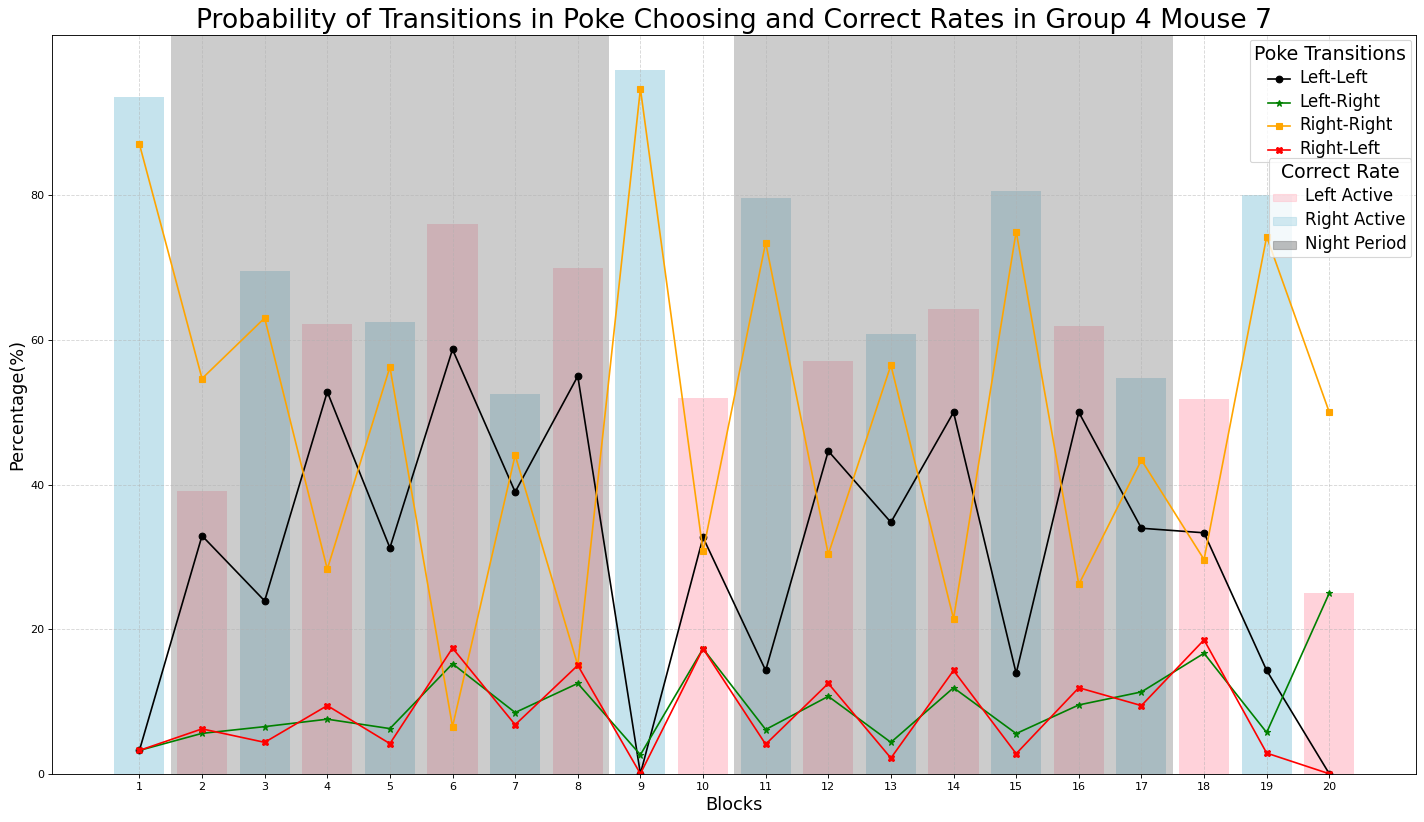

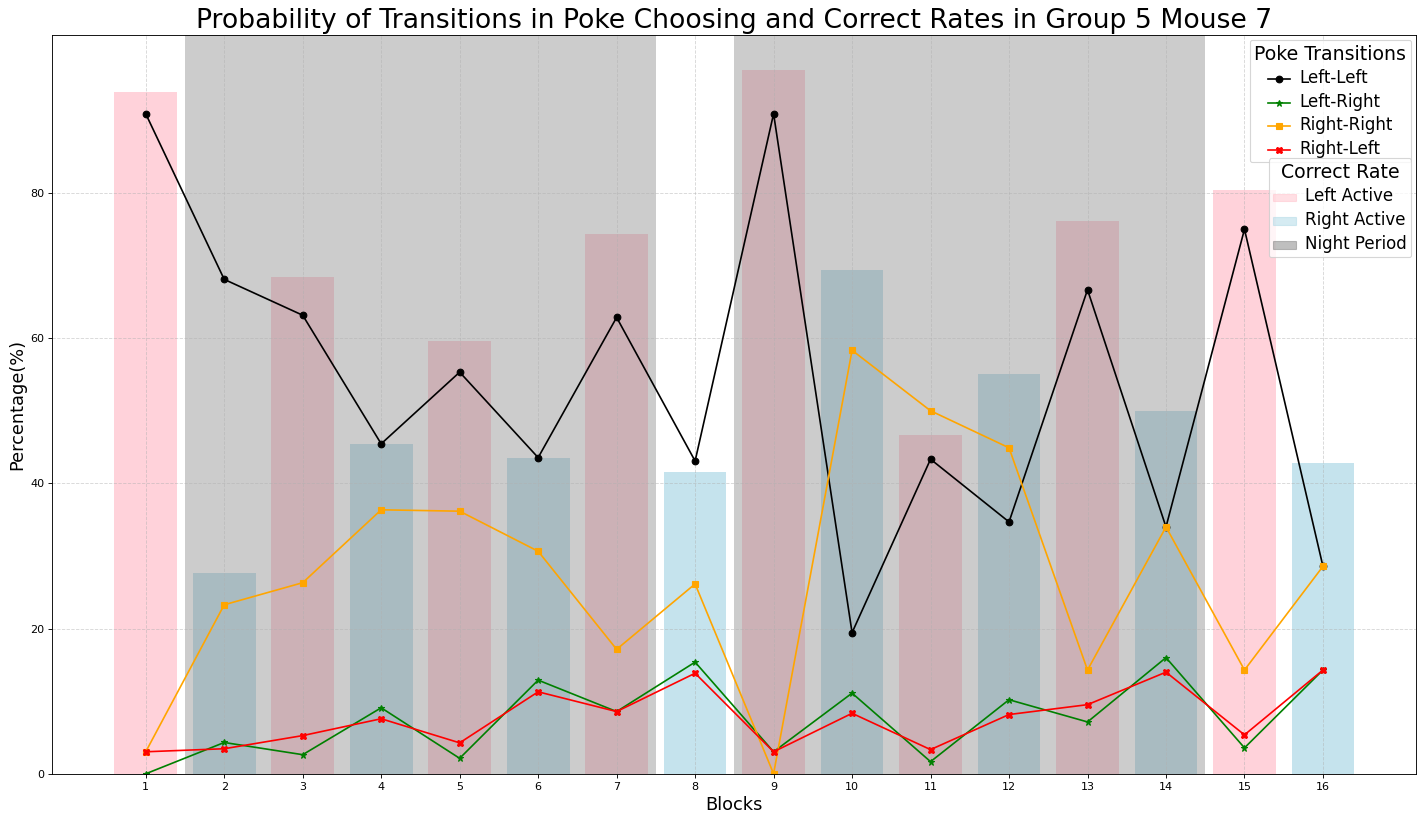

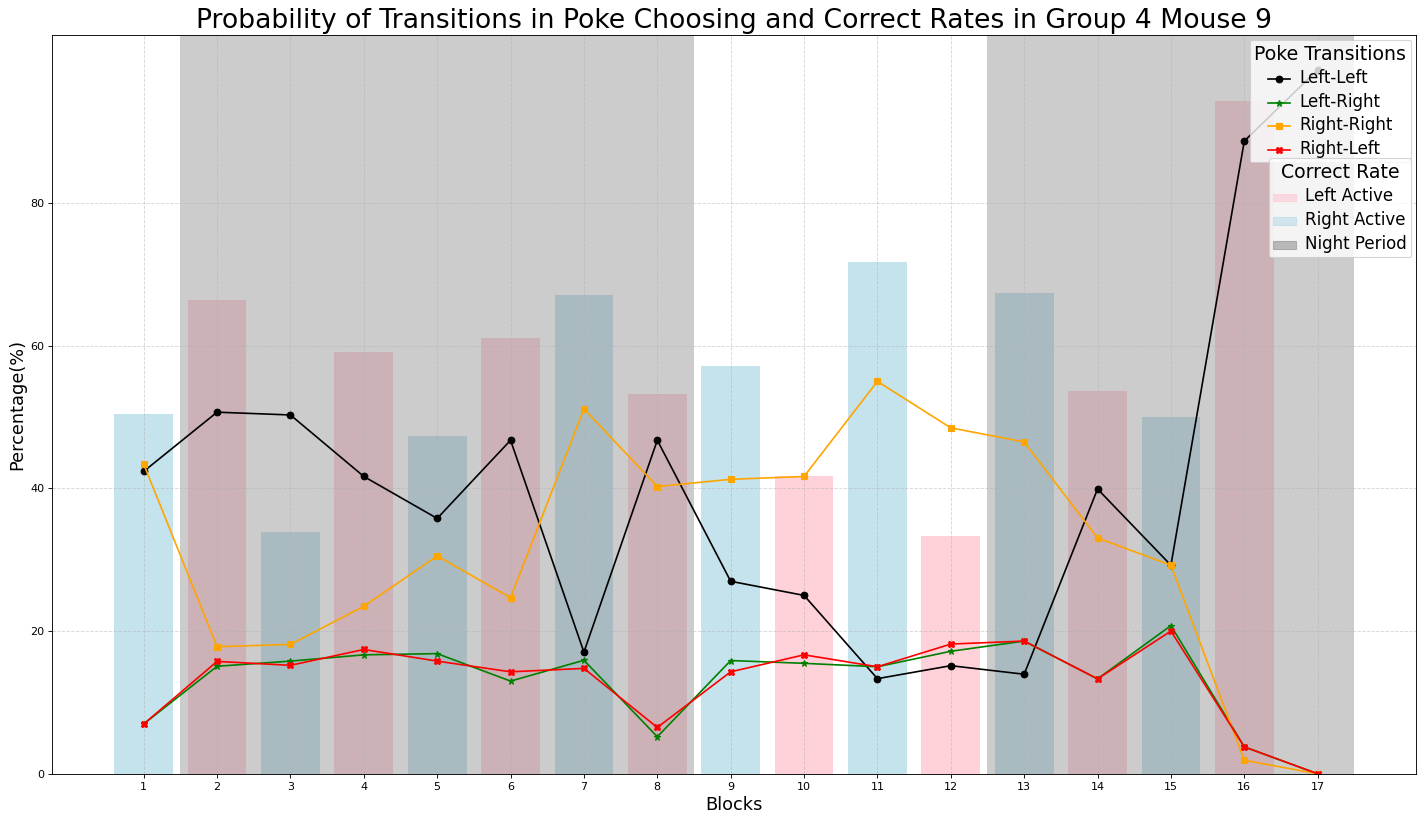

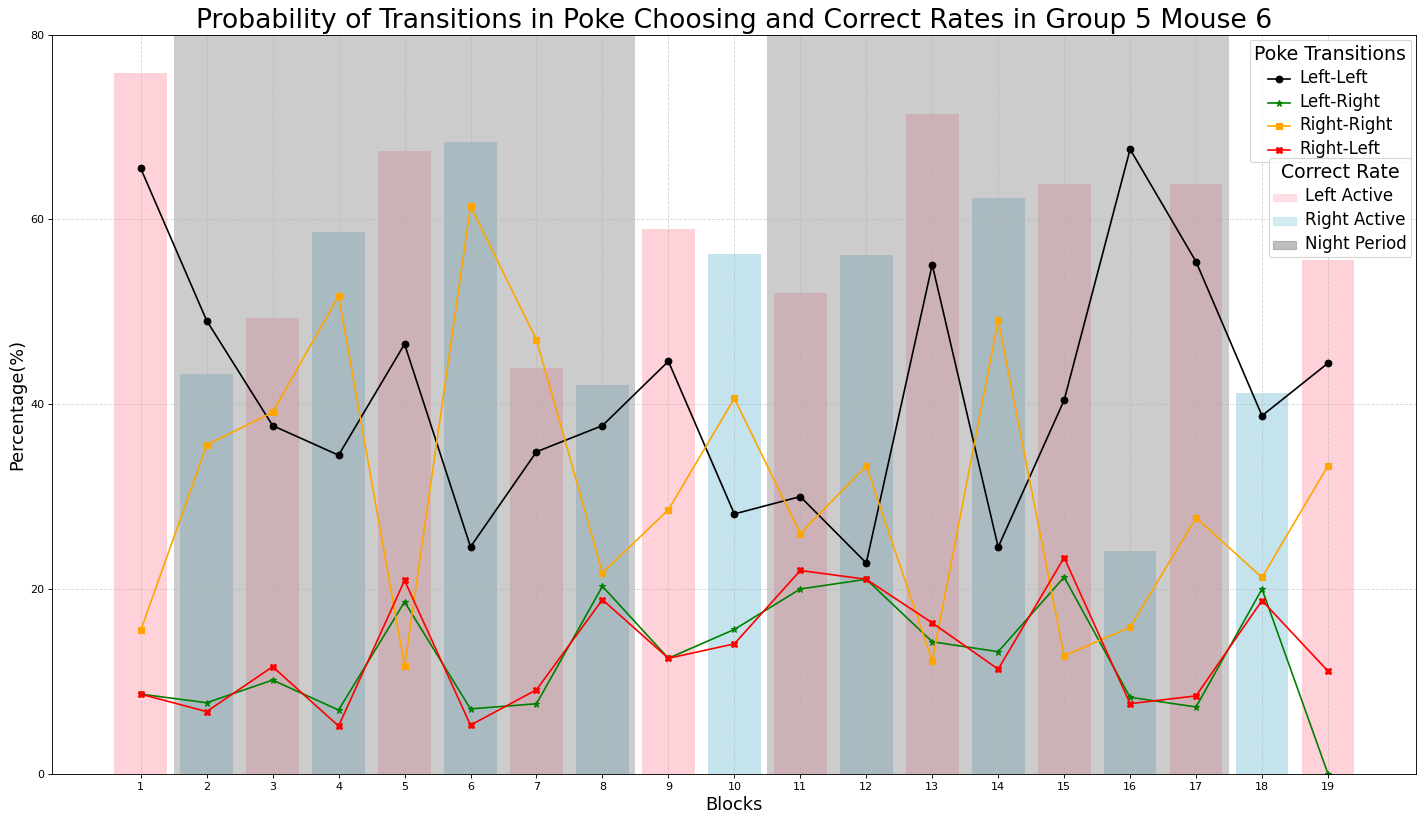

In [10]:
exp_scores = []

for path in paths.reversal_ivsa_exp:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    diff, left_start = dit.get_difference_key(data_stats)
    exp_scores.append(dit.learning_score_grad(diff, left_start))

In [11]:
ctrl_scores, exp_scores

([142.15000000000003,
  -106.69,
  780.14,
  446.31000000000006,
  1188.6999999999998,
  439.5,
  938.5599999999998],
 [902.49,
  523.31,
  178.98999999999995,
  1119.23,
  616.6800000000001,
  319.2800000000001,
  346.33])

In [15]:
import intervals as invs

invs.perform_T_test(ctrl_scores, exp_scores, test_side='two-sided')

P Value is  0.9073559307029712
There is no significant difference between the two groups.
